<img style="float: right;" src=" 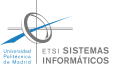" alt="ETSISI logo" />


# _Web scraping_ con Python <a id="top"></a>

<i><small>Autor: Alberto Díaz Álvarez <alberto.da@gmail.com><br>Última actualización: 2023-02-13</small></i>

***

In [1]:
import os

## La biblioteca `urllib`

In [2]:
from urllib.parse import urlencode
from urllib.request import urlopen, Request

### Ejemplo básico

In [3]:
request = Request('https://www.python.org/')
with urlopen(request) as response:
    received_bytes = response.read()
content = received_bytes.decode()
print(content[:72], '...')

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 ...


### Peticiones GET con parámetros

In [4]:
params = urlencode({'q': 'python'})
url = 'https://www.google.com/search?' + params
print(url)
# https://www.google.com/search?q=python

https://www.google.com/search?q=python


### Peticiones POST con parámetros

In [5]:
data = urlencode({'key': 'value'}).encode()
request = Request('https://httpbin.org/anything', data=data)
with urlopen(request) as response:
    print(response.read().decode())

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "9", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Python-urllib/3.10", 
    "X-Amzn-Trace-Id": "Root=1-63e9ff40-3f7bfb1718f33c8e0f119900"
  }, 
  "json": null, 
  "method": "POST", 
  "origin": "138.100.146.146", 
  "url": "https://httpbin.org/anything"
}



### Envío de ficheros por POST

In [6]:
image_path = 'images/python.png'
image_size = os.path.getsize(image_path)
image_data = open(image_path, 'rb')
request = Request('https://httpbin.org/anything', data=image_data)
request.add_header('Content-Length', image_size)
request.add_header('Content-Type', 'image/png')
with urlopen(request) as response:
    print(response.read().decode())

{
  "args": {}, 
  "data": "data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAACAAAAAQACAYAAAB1B7lEAAABS2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS42LWMxMzggNzkuMTU5ODI0LCAyMDE2LzA5LzE0LTAxOjA5OjAxICAgICAgICAiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIi8+CiA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSJyIj8+IEmuOgAAIABJREFUeJzs3VGInfeZJvgn7o5oMaXZSs0slqIoXUvJog0KqhZT87XHIJeZJV5QQ5fmJvHFbJUbswPZC+ujYftmjBxylYHhODe+Cl36ti+ShgWpYcyS3guVBT3rGi1yhdZg1o7o6ghFMUyXa7GCGnUCe3GObMmWrarSOed/vnN+PzCSJdt6dGN06n3+75sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

### Leer las cabeceras de una respuesta

In [7]:
request = Request('https://www.python.org/')
with urlopen(request) as response:
    print(response.headers)

Connection: close
Content-Length: 50210
Server: nginx
Content-Type: text/html; charset=utf-8
X-Frame-Options: DENY
Via: 1.1 vegur, 1.1 varnish, 1.1 varnish
Accept-Ranges: bytes
Date: Mon, 13 Feb 2023 09:13:37 GMT
Age: 732
X-Served-By: cache-iad-kiad7000025-IAD, cache-mad22077-MAD
X-Cache: HIT, HIT
X-Cache-Hits: 155, 3
X-Timer: S1676279618.964977,VS0,VE0
Vary: Cookie
Strict-Transport-Security: max-age=63072000; includeSubDomains; preload




## Biblioteca `requests`

In [8]:
import requests

### Petición GET

In [9]:
response = requests.get('https://httpbin.org/anything')
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff45-336e185010305a9e5a970bc2"\n  }, \n  "json": null, \n  "method": "GET", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

### Petición GET con parámetros

In [10]:
response = requests.get('https://httpbin.org/anything', params={
    'param1': 'val1',
    'param2': 'val2'
})
response.text

'{\n  "args": {\n    "param1": "val1", \n    "param2": "val2"\n  }, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff45-1c403c0e160958336909b710"\n  }, \n  "json": null, \n  "method": "GET", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything?param1=val1&param2=val2"\n}\n'

### Petición GET con un tiempo de respuesta

In [11]:
response = requests.get('https://httpbin.org/anything', timeout=1)
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff47-29d39eb800000d5562505fae"\n  }, \n  "json": null, \n  "method": "GET", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

### Envío de datos en peticiones POST/PUT/PATCH

#### POST

In [12]:
response = requests.post('https://httpbin.org/anything', data={
  'param1': 'val1',
  'param2': 'val2'
})
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "param1": "val1", \n    "param2": "val2"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff48-3adc9da27b3aa7bb5ff42b96"\n  }, \n  "json": null, \n  "method": "POST", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

#### PUT

In [13]:
response = requests.put('https://httpbin.org/anything', data={
  'param1': 'val1',
  'param2': 'val2'
})
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "param1": "val1", \n    "param2": "val2"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff48-504bac8e4f419e905e6c16df"\n  }, \n  "json": null, \n  "method": "PUT", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

#### PATCH

In [14]:
response = requests.patch('https://httpbin.org/anything', data={
  'param1': 'val1',
  'param2': 'val2'
})
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "param1": "val1", \n    "param2": "val2"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff49-180e547f2eb82b18746c1a7a"\n  }, \n  "json": null, \n  "method": "PATCH", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

### Envío de datos especificando el contenido enviado

In [15]:
response = requests.post('https://httpbin.org/anything', data={
    'param1': 'val1',
    'param2': 'val2'
}, headers={'Content-Type': 'text/xml'})
response.text

'{\n  "args": {}, \n  "data": "param1=val1&param2=val2", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "text/xml", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff4a-45e585b30540c73c40f773e5"\n  }, \n  "json": null, \n  "method": "POST", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

In [16]:
response = requests.post('https://httpbin.org/anything',
    data='<?xml version="1.0" encoding="UTF-8"?><soap:Envelope...',
    headers={'Content-Type': 'text/xml'})
response.text

'{\n  "args": {}, \n  "data": "<?xml version=\\"1.0\\" encoding=\\"UTF-8\\"?><soap:Envelope...", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "55", \n    "Content-Type": "text/xml", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff4b-4cb22eb75375fe59618cda56"\n  }, \n  "json": null, \n  "method": "POST", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

### Envío de ficheros

In [17]:
response = requests.post('https://httpbin.org/anything', files={
  'file1': open('images/python.png', 'rb'),
  'file2': open('images/python.png', 'rb'),
})
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {\n    "file1": "data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAACAAAAAQACAYAAAB1B7lEAAABS2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS42LWMxMzggNzkuMTU5ODI0LCAyMDE2LzA5LzE0LTAxOjA5OjAxICAgICAgICAiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIi8+CiA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSJyIj8+IEmuOgAAIABJREFUeJzs3VGInfeZJvgn7o5oMaXZSs0slqIoXUvJog0KqhZT87XHIJeZJV5QQ5fmJvHFbJUbswPZC+ujYftmjBxylYHhODe+Cl36ti+ShgWpYcyS3guVBT3rGi1yhdZg1o7o6ghFMUyXa7GCGnUCe3GObMmWrarSOed/vnN+PzCSJdt6dGN06n3+75sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

####  Envío de ficheros especificando nombre y tipo de fichero

In [18]:
response = requests.post('https://httpbin.org/anything', files={
  'file1': ('python-1.pdf', open('images/python.png', 'rb'), 'application/pdf'),
  'file2': ('python-2.pdf', open('images/python.png', 'rb'), 'application/pdf'),
})
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {\n    "file1": "data:application/pdf;base64,iVBORw0KGgoAAAANSUhEUgAACAAAAAQACAYAAAB1B7lEAAABS2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS42LWMxMzggNzkuMTU5ODI0LCAyMDE2LzA5LzE0LTAxOjA5OjAxICAgICAgICAiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIi8+CiA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSJyIj8+IEmuOgAAIABJREFUeJzs3VGInfeZJvgn7o5oMaXZSs0slqIoXUvJog0KqhZT87XHIJeZJV5QQ5fmJvHFbJUbswPZC+ujYftmjBxylYHhODe+Cl36ti+ShgWpYcyS3guVBT3rGi1yhdZg1o7o6ghFMUyXa7GCGnUCe3GObMmWrarSOed/vnN+PzCSJdt6dGN06n3+75sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

### Especificando cabeceras

In [19]:
response = requests.get('https://httpbin.org/anything', headers={
    'Accept': 'application/json;q=0.9,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US, en;q=0.9, es;q=0.8'
})
response.headers

{'Date': 'Mon, 13 Feb 2023 09:13:50 GMT', 'Content-Type': 'application/json', 'Content-Length': '479', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

### Enviando cookies en una petición

In [20]:
jar = requests.cookies.RequestsCookieJar()
jar.set('cookie1', 'v1', domain='httpbin.org', path='/')
jar.set('cookie2', 'v2', domain='httpbin.org', path='/anything')
response = requests.get('https://httpbin.org/anything', cookies=jar)
response.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Cookie": "cookie2=v2; cookie1=v1", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.28.2", \n    "X-Amzn-Trace-Id": "Root=1-63e9ff4f-7f5e6b4001b3088d29c6c2bc"\n  }, \n  "json": null, \n  "method": "GET", \n  "origin": "138.100.146.146", \n  "url": "https://httpbin.org/anything"\n}\n'

### Manteniendo una sesión entre peticiones

In [21]:
session = requests.Session()
session.get('https://httpbin.org/cookies/set?cookie1=val1')
session.get('https://httpbin.org/cookies/set?cookie2=val2')
response = session.get('https://httpbin.org/cookies')
response.text

'{\n  "cookies": {\n    "cookie1": "val1", \n    "cookie2": "val2"\n  }\n}\n'

***

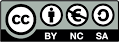

[Volver al inicio](#top)